# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$ v'_{x} = 0 $

$ x' = v_{x} $

$ v'_{y} = -g $

$ y' = v_{y} $

Code the equations into a function 

In [1]:
#imports
import numpy as np
import scipy.integrate as int
import matplotlib.pyplot as plt

In [2]:
#define projectile motion function in vaccum
#def proj_vac

def proj_vac(t, y):
    g = 9.81
    
    dx = y[2]
    dy = y[3]
    dvx = 0.0
    dvy = -g
    
    return np.array([dx,dy,dvx,dvy])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [3]:
#code
x0 = 0.0001
y0 = 0.0001
v0 = 300.0
theta = 50
vx0 = v0 * np.cos(theta*np.pi/180)
vy0 = v0 * np.sin(theta*np.pi/180)

r0 = [x0,y0,vx0,vy0]

tspan = (0,50.0)
teval = np.linspace(tspan[0],tspan[1],10000)

def end(t,y):
    return y[1]

end.terminal = True

sol = int.solve_ivp(proj_vac, tspan, r0, t_eval = teval, events=end)
print('Time in the air:', sol.t_events[-1])
print('Total range:', sol.y[0][-1])
ta = sol.t
xa = sol.y[0]
ya = sol.y[1]

Time in the air: [46.85287157]
Total range: 9034.319204640258


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

Text(0.5, 1.0, 'Projectile Motion Neglecting Air Resistance')

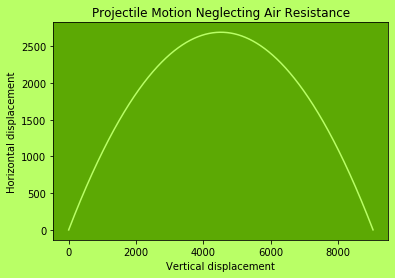

In [4]:
#codes
fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:light lime green')
axes.patch.set_facecolor('xkcd:leaf green')
plt.plot(xa,ya,color='xkcd:light lime green')
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion Neglecting Air Resistance')

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [5]:
#codes
def rk4(f,t,y0):
    n = len(t)
    yy = np.zeros((n,len(y0)))
    yy[0] = y0
    
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i],yy[i])
        k2 = f(t[i] + dt/2.0, yy[i] + dt/2.0 * k1)
        k3 = f(t[i] + dt/2.0, yy[i] + dt/2.0 * k2)
        k4 = f(t[i] + dt, yy[i] + dt*k3)
        
        yy[i+1] = yy[i] + (dt/6.0) * (k1 + 2.0*k2 + 2.0*k3 + k4)
    return yy

solrk4 = rk4(proj_vac, teval, r0)

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

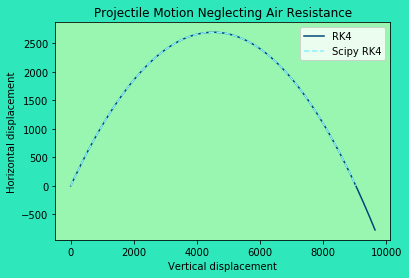

In [6]:
fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:aqua marine')
axes.patch.set_facecolor('xkcd:light sea green')
plt.plot(solrk4[:,0],solrk4[:,1],color='xkcd:prussian blue',label='RK4')
plt.plot(xa,ya,color='xkcd:robin egg blue',linestyle='dashed',label='Scipy RK4')
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion Neglecting Air Resistance')
plt.legend(loc='best')

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [7]:
#code
def proj_drag(t,y):
    g = 9.81
    gamma = 0.25
    lam = 10000.0
    D = 15.0/100.0
    density = 7800
    vol = (4.0/3.0)*np.pi*(D/2.0)**3
    m = density*vol
    c = gamma * D**2
    v = np.sqrt(y[2]**2 + y[3]**2)
    
    dx = y[2]
    dy = y[3]
    dvx = -c/m * v * y[2]
    dvy = -g - c/m * v * y[3]
    
    return [dx,dy,dvx,dvy]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [8]:
#codes
tspan = (0,50.0)
teval = np.linspace(tspan[0],tspan[1],10000)

soldrag = int.solve_ivp(proj_drag, tspan, r0, t_eval = teval, events=end)
print('Time in the air:', soldrag.t_events[-1])
print('Total range:', soldrag.y[0][-1])
tb = soldrag.t
xb = soldrag.y[0]
yb = soldrag.y[1]

Time in the air: [31.18558094]
Total range: 2690.698528522289


Plot the ball's trajecory and find it's horizontal range

Text(0.5, 1.0, 'Projectile Motion With Drag')

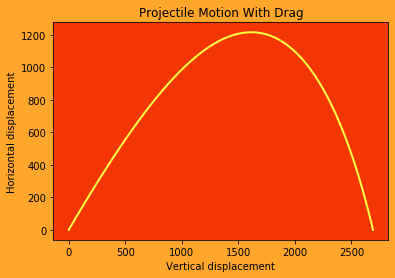

In [9]:
#codes
fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:mango')
axes.patch.set_facecolor('xkcd:orangish red')
plt.plot(xb,yb,color='xkcd:canary yellow',lw=2)
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion With Drag')

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [10]:
#code
def proj_dragatm(t,y):
    g = 9.81
    gamma = 0.25
    lam = 10000.0
    D = 15.0/100.0
    density = 7800
    vol = (4.0/3.0)*np.pi*(D/2.0)**3
    m = density*vol
    c = gamma * D**2*np.exp(-y0/gamma)
    v = np.sqrt(y[2]**2 + y[3]**2)
    
    dx = y[2]
    dy = y[3]
    dvx = -c/m * v * y[2]
    dvy = -g - c/m * v * y[3]

    return [dx,dy,dvx,dvy]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [11]:
#codes
dragatm = int.solve_ivp(proj_dragatm, tspan, r0, t_eval = teval, events=end)
print('Time in the air:', dragatm.t_events[-1])
print('Total range:', dragatm.y[0][-1])
tc = dragatm.t
xc = dragatm.y[0]
yc = dragatm.y[1]

Time in the air: [31.18848855]
Total range: 2691.4433373301094


Plot the ball's trajectory and find it's horizontal range

Text(0.5, 1.0, 'Projectile Motion With Atmospheric Drag')

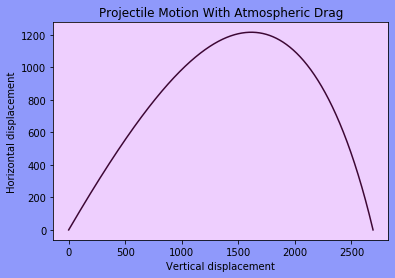

In [12]:
#codes
fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:periwinkle blue')
axes.patch.set_facecolor('xkcd:pale lavender')
plt.plot(xc,yc,color='xkcd:aubergine')
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion With Atmospheric Drag')

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

Text(0.5, 1.0, 'Projectile Motion Variations')

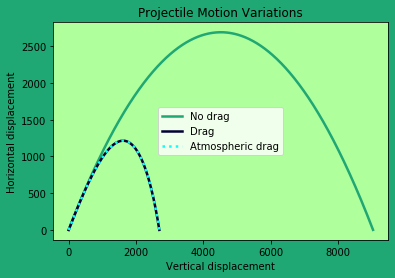

In [13]:
#codes
fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:jade')
axes.patch.set_facecolor('xkcd:pastel green')
plt.plot(xa,ya,color='xkcd:jade',label='No drag',lw=2.5)
plt.plot(xb,yb,color='xkcd:midnight blue',label='Drag',lw=2.5)
plt.plot(xc,yc,color='xkcd:bright turquoise',linestyle='dotted',label='Atmospheric drag',lw=2.5)
plt.legend(loc='best')
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion Variations')

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)  At first glance it seems like the variation from drag or atmosphere have the same impact on the motion. However, this is only true because the initial y value is very low and the atmospheric drag depends on the initial y value. Below you can see the comparison between the three above variations on the motion with the addition of atmospheric drag with an initial y value of 1.

Time in the air: [46.16350399]
Total range: 8562.409698565614


Text(0.5, 1.0, 'Projectile Motion Variations')

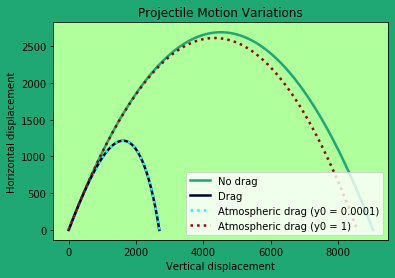

In [14]:
y0 = 1

dragatm = int.solve_ivp(proj_dragatm, tspan, r0, t_eval = teval, events=end)
print('Time in the air:', dragatm.t_events[-1])
print('Total range:', dragatm.y[0][-1])
td = dragatm.t
xd = dragatm.y[0]
yd = dragatm.y[1]

fig = plt.figure()
axes = fig.add_subplot()
fig.patch.set_facecolor('xkcd:jade')
axes.patch.set_facecolor('xkcd:pastel green')
plt.plot(xa,ya,color='xkcd:jade',label='No drag',lw=2.5)
plt.plot(xb,yb,color='xkcd:midnight blue',label='Drag',lw=2.5)
plt.plot(xc,yc,color='xkcd:bright turquoise',linestyle='dotted',label='Atmospheric drag (y0 = 0.0001)',lw=2.5)
plt.plot(xd,yd,color='xkcd:blood red',linestyle='dotted',label='Atmospheric drag (y0 = 1)',lw=2.5)
plt.legend(loc='best')
plt.xlabel('Vertical displacement')
plt.ylabel('Horizontal displacement')
plt.title('Projectile Motion Variations')

In [15]:
This shows that with a higher y0 value, the atmospheric drag has less of an impact on the motion.

SyntaxError: invalid syntax (<ipython-input-15-95e5bdb75084>, line 1)